# IA340 Mini Project

**Project Title:** Impact of Peak and Off-Peak Hours on MTA Bus Speeds

## Research Question

Are there significant differences in bus speeds between peak and off-peak hours?

## Dataset Documentation

- **Source:** https://catalog.data.gov/dataset/mta-bus-speeds-beginning-2020
- **Description:** New York City's MTA Bus Speeds from 2020-2024.
- **Time Period:** 2020 to 2024
- **Reason for Choice:** Has a real-world impact of NYC's rush hour and public transit efficiency. I chose this research question specifically because I take public transport often and want to see if peak/off-peak has a tangible impact on speed. 

## Import

In [1]:
import pandas as pd

bus_data = pd.read_csv('s3://ia340-2025-fall-1128/MTA_Bus_Speed.csv')

bus_data.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,month,borough,day_type,trip_type,route_id,period,total_mileage,total_operating_time,average_speed
0,2020-01-01,Bronx,1,LCL/LTD,BX1,Off-Peak,21090.045,3085,6.835836
1,2020-01-01,Bronx,1,LCL/LTD,BX1,Peak,8898.787,1360,6.542821
2,2020-01-01,Bronx,2,LCL/LTD,BX1,Off-Peak,7162.781,1018,7.035971
3,2020-01-01,Bronx,2,LCL/LTD,BX1,Peak,2749.674,395,6.956308
4,2020-01-01,Bronx,1,LCL/LTD,BX10,Off-Peak,23386.701,2678,8.732065


### Markdown Explanation
- Imported the pandas library for data analysis.
- Read in the CSV file with the chosen dataset and store it in the bus_data DataFrame.
- Display the first five lines of the DataFrame to ensure it was read in correctly.

## Clean

In [2]:
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71906 entries, 0 to 71905
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   month                 71906 non-null  object 
 1   borough               71906 non-null  object 
 2   day_type              71906 non-null  int64  
 3   trip_type             71906 non-null  object 
 4   route_id              71906 non-null  object 
 5   period                71906 non-null  object 
 6   total_mileage         71906 non-null  float64
 7   total_operating_time  71906 non-null  int64  
 8   average_speed         71906 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 4.9+ MB


In [3]:
bus_data.describe()

,day_type,total_mileage,total_operating_time,average_speed
count,71906.000000,71906.000000,71906.000000,71906.000000
mean,1.448933,7128.174209,844.531555,9.680801
std,0.497389,7631.971468,941.724455,3.824775
min,1.000000,7.695000,0.000000,3.834329
25%,1.000000,2149.689000,227.250000,6.914719
50%,1.000000,4810.494350,510.000000,8.538310
75%,2.000000,9159.644250,1120.000000,11.577488
max,2.000000,77847.620000,10073.000000,33.798970


In [4]:
bus_data.isnull().sum()

month                   0
borough                 0
day_type                0
trip_type               0
route_id                0
period                  0
total_mileage           0
total_operating_time    0
average_speed           0
dtype: int64

In [5]:
bus_data = bus_data.dropna() # drop any null values
bus_data.isnull().sum()

month                   0
borough                 0
day_type                0
trip_type               0
route_id                0
period                  0
total_mileage           0
total_operating_time    0
average_speed           0
dtype: int64

In [6]:
bus_data.duplicated().sum()

0

In [7]:
bus_data['month'] = pd.to_datetime(bus_data['month'])

In [8]:
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71906 entries, 0 to 71905
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   month                 71906 non-null  datetime64[ns]
 1   borough               71906 non-null  object        
 2   day_type              71906 non-null  int64         
 3   trip_type             71906 non-null  object        
 4   route_id              71906 non-null  object        
 5   period                71906 non-null  object        
 6   total_mileage         71906 non-null  float64       
 7   total_operating_time  71906 non-null  int64         
 8   average_speed         71906 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 4.9+ MB


In [9]:
bus_data['average_speed'].describe()

count    71906.000000
mean         9.680801
std          3.824775
min          3.834329
25%          6.914719
50%          8.538310
75%         11.577488
max         33.798970
Name: average_speed, dtype: float64

In [10]:
bus_data['borough'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

### Markdown Explanation:
- bus_data.info() was used to ensure there are **71,906 data entries** for each column, as well as checking the data types.
- bus_data.describe() was used to briefly check the dataset for any potential outliers and for things like the average speed.
- bus_data.isnull().sum() was used to check if there were any cells in the dataset with null values. The result showed **no null values**. However, I ran bus_data = bus_data.dropna() and
bus_data.isnull().sum() just to be sure.
- bus_data.duplicated().sum() was used to see if there were any duplicate values. The result was **no duplicate values**.
- bus_data['month'] = pd.to_datetime(bus_data['month']) was used to convert the 'month' column into a DateTime object so I can later perform a time-series analysis on bus speed based on period. bus_data.info() was run afterwards to ensure it was done correctly.
- print(bus_data['average_speed'].describe()) was run to check the validity of the data. The minimum speed was 3.83 and not 0 or a negative number, and the maximum was a reasonable speed of 33.79, indicating the validity of the dataset.
- print(bus_data['borough'].unique()) was also run to check the validity of the data to see if there were any misspellings of the borough names. There were only 5 results, all spelled correctly.

## Process/Aggregate

In [11]:
period_speed = bus_data.groupby(['borough', 'period'])['average_speed'].mean().reset_index()
period_speed

,borough,period,average_speed
0,Bronx,Off-Peak,8.939251
1,Bronx,Peak,8.396717
2,Brooklyn,Off-Peak,8.503015
3,Brooklyn,Peak,7.997466
4,Manhattan,Off-Peak,6.670810
5,Manhattan,Peak,6.333352
6,Queens,Off-Peak,10.339354
7,Queens,Peak,9.579714
8,Staten Island,Off-Peak,16.233532
9,Staten Island,Peak,15.070042


### Markdown Explanation & Relevance to the Research Question
- In order to answer the research question, "Are there significant differences in bus speeds between peak and off-peak hours?," the raw data (which contains tens of thousands of individual records) has to be summarized. The new variable above (period_speed) groups the data by borough and by period (off-peak or peak) and then calculates the mean speed for this group.
- It is turning the dataset into a smaller set of data to compare against, which can result in cleaner visualizations or a comparison of average speed by period based on borough. 

## Query

In [12]:
weekday_data = bus_data[bus_data['day_type'] == 1]

In [13]:
weekend_data = bus_data[bus_data['day_type'] == 2]

In [14]:
weekday_speeds = weekday_data.groupby(['borough', 'period'])['average_speed'].mean().reset_index()
weekend_speeds = weekend_data.groupby(['borough', 'period'])['average_speed'].mean().reset_index()

In [15]:
weekday_speeds

,borough,period,average_speed
0,Bronx,Off-Peak,8.599227
1,Bronx,Peak,7.787175
2,Brooklyn,Off-Peak,8.272308
3,Brooklyn,Peak,7.502336
4,Manhattan,Off-Peak,6.369632
5,Manhattan,Peak,5.903744
6,Queens,Off-Peak,10.474188
7,Queens,Peak,9.382507
8,Staten Island,Off-Peak,16.431879
9,Staten Island,Peak,15.017133


In [23]:
weekend_speeds

,borough,period,average_speed
0,Bronx,Off-Peak,9.285241
1,Bronx,Peak,9.016761
2,Brooklyn,Off-Peak,8.744332
3,Brooklyn,Peak,8.503916
4,Manhattan,Off-Peak,6.973347
5,Manhattan,Peak,6.764897
6,Queens,Off-Peak,10.165453
7,Queens,Peak,9.834978
8,Staten Island,Off-Peak,15.778679
9,Staten Island,Peak,15.191897


### Markdown Explanation
- I wanted to see if there is a significant difference in average speed by borough and period if it was a weekday or weekend.
- weekday_data = bus_data[bus_data['day_type'] == 1] and weekend_data = bus_data[bus_data['day_type'] == 2] were used to classify weekday or weekend and were then used to filter the data by if the condition is true (1 or 2). The dataset also contained a data dictionary confirming **1 = weekday and 2 = weekend** (https://data.ny.gov/Transportation/MTA-Bus-Speeds-2020-2024/6ksi-7cxr/about_data)
- weekday_speeds = weekday_data.groupby(['borough', 'period'])['average_speed'].mean().reset_index() and weekend_speeds = weekend_data.groupby(['borough', 'period'])['average_speed'].mean().reset_index() are being used to group the results by borough and period and calculating the average speed for those groups and into a new DataFrame. 
- The first line is creating the DataFrames themselves (weekday_data and weekend_data).

## Visualize

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

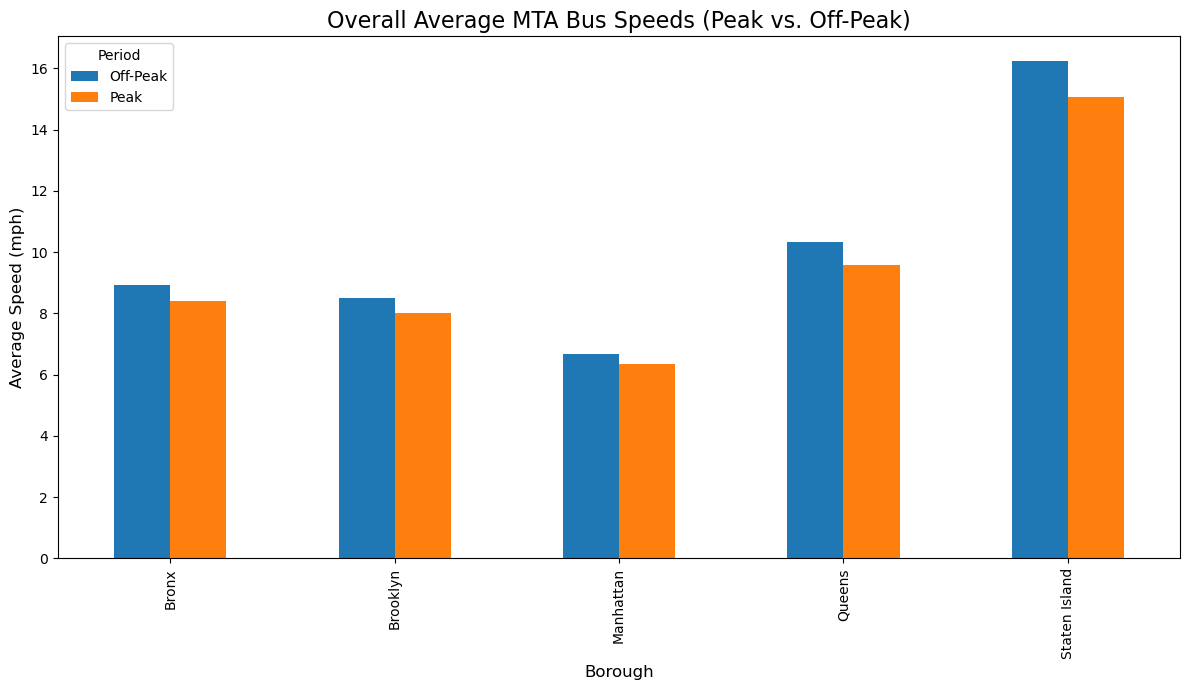

In [17]:
chart = period_speed.pivot(index='borough', columns='period', values='average_speed')

grouped_chart = chart.plot(kind='bar', figsize=(12, 7))

plt.title('Overall Average MTA Bus Speeds (Peak vs. Off-Peak)', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)
plt.legend(title='Period')
plt.tight_layout()

## Markdown Explanation
- I chose a grouped bar chart for this visualization in order to show the average bus speed during the peak/off-peak periods, as well as by borough. By using a grouped bar chart, it also makes it easier to show the overall trends and the differences, helping to answer the research question, "Are there significant differences in bus speeds between peak and off-peak hours?"
- The chart shows that bus speeds are slowest in the most congested areas (Manhattan) and fastest in the least congested ones (Staten Island). Additionally, travel time for all bus riders is impacted by rush hour traffic, making **off-peak travel the faster option in every borough** by approximately 1mph.
- Buses in **Staten Island have significantly higher average speeds** than in any other borough, reaching over 16 mph during off-peak hours and around 15 mph during peak hours. This could be due to less overall traffic, more express routes, and longer distances between stops.
- **Manhattan has the slowest average bus speeds** by a large margin. Speeds are below 7 mph during off-peak hours and just over 6 mph during peak hours. However, this is expected due to the borough's high population density, severe traffic congestion, and a high number of bus stops.

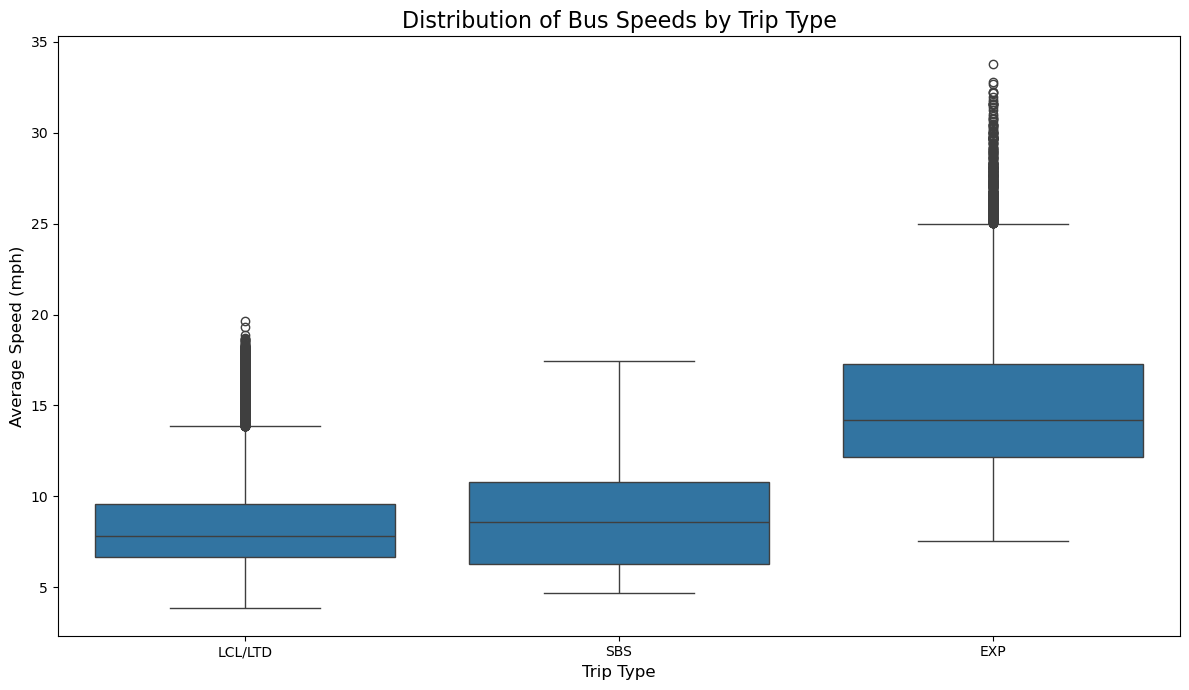

In [18]:
plt.figure(figsize=(12, 7))

sns.boxplot(data=bus_data, x='trip_type', y='average_speed')

plt.title('Distribution of Bus Speeds by Trip Type', fontsize=16)
plt.xlabel('Trip Type', fontsize=12)
plt.ylabel('Average Speed (mph)', fontsize=12)
plt.tight_layout()

## Markdown Explanation
- I chose a boxplot for this visualization to show the distribution of average bus speeds in miles per hour (mph) based on three different types of bus service: Local/Limited (LCL/LTD), Select Bus Service (SBS), and Express (EXP). This helps to understand the research question ("Are there significant differences in bus speeds between peak and off-peak hours?") since it is providing additional context about the underlying factors that are contributing to the speeds during peak and off-peak periods.
- The chart shows that **Express (EXP) buses are faster**. The median speed is around 14 mph. Select Bus Service (SBS) is in the **middle**, with a median speed of around 9 mph. **Local/Limited (LCL/LTD) buses are the slowest**, with a median speed of about 8 mph.
- While EXP buses are faster on average, **Local/Limited buses have the most consistent speeds**. The box is compact, meaning the middle 50% of all local bus trips occur within a narrow range (about 6 to 9.5 mph). This makes sense, as they operate in urban environments. **Express buses have the most variable speeds.** The boxplot is spread out, indicating a wide range of speeds.
- Overall, this chart is indicating that **trip type is a major predictor of bus speed**, which helps to explain the reasons for the speed differences seen between boroughs in the first chart.

## Overall Findings

- The analysis confirms that there are **significant and consistent differences** in MTA bus speeds between peak and off-peak hours, directly answering the research question. Across every New York City borough, **buses travel approximately 1 mph faster** during off-peak periods, demonstrating the impact of rush hour traffic on the transit system, despite its small impact. 
- However, the findings also show that while the time of day causes a predictable slowdown, two other factors are even more powerful predictors of bus speed: **the borough** and **the type of service**.